In [2]:
import pandas as pd
import vertica_python
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import os
import scipy
from scipy.stats import ttest_ind
import scipy.stats as stats

In [3]:
username = os.getenv('VERTICA_USERNAME')
password = os.getenv('VERTICA_PASSWORD')
conn_info = {'host': 'warehouse.analytics.edx.org',
             'port': 5433,
             'user': username,
             'password': password,
             'database': 'warehouse',
             'read_timeout': 600,
             'unicode_error': 'strict',
             'ssl': False}

In [4]:
sns.set_context("poster")
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
xkcd = sns.xkcd_palette(colors)

In [5]:
min_enroll_group_size = 100

In [80]:
def make_plots(dimension=None, subject_count=None):
    
    plot_order = [
    '<-120',
    '-90 to -120',
    '-60 to -90',
    '-30 to -60',
    '0 to -30'
]
    
    df = pd.DataFrame()
    
    if dimension==None:
        df = enroll_group_df.groupby(['enroll_group','course_id']).sum().reset_index()
        df = df[df.cnt_enrolls_vtr > min_enroll_group_size]
        
    elif dimension=='subject_title':
        filter_df = enroll_group_df.groupby(['subject_title']).sum().reset_index()
        filter_list = filter_df.sort_values('cnt_enrolls', ascending=False).head(subject_count)['subject_title'].tolist()    
        df = enroll_group_df.groupby(['enroll_group','course_id', dimension]).sum().reset_index()
        df = df[df.cnt_enrolls_vtr > min_enroll_group_size]
        df = df[df['subject_title'].isin(filter_list)]
    else:
        df = enroll_group_df.groupby(['enroll_group','course_id', dimension]).sum().reset_index()
        df = df[df.cnt_enrolls_vtr > min_enroll_group_size]
    
    group_filter = df.groupby('course_id').count().reset_index()
    course_filter_list = group_filter[group_filter.enroll_group == 6].course_id.tolist()
    df = df[df['course_id'].isin(course_filter_list)]
    
    df['vtr'] = df.cnt_verifs*100.0/df.cnt_enrolls_vtr
    df['engaged_rate'] = df.cnt_consumed_content*100.0/df.cnt_enrolls
    
    ax = sns.factorplot(data = df, x = 'enroll_group', y = 'vtr', kind = 'point', hue=dimension,
               size = 10, order = plot_order, errwidth=3, capsize=0.05)
    ax.set(title='VTR by enrollment group (days prior to course start)',
          xlabel = 'Enrollment Group (days prior to course start)',
          ylabel = 'VTR (%)')
    ax.set_xticklabels(rotation=90)
    
    ax = sns.factorplot(data = df, x = 'enroll_group', y = 'engaged_rate', kind = 'point', hue=dimension,
               size = 10, order = plot_order, errwidth=3, capsize=0.05)
    ax.set(title='Engagement Rate by enrollment group (days prior to course start)',
          xlabel = 'Enrollment Group (days prior to course start)',
          ylabel = 'Engagement Rate (%)')
    ax.set_xticklabels(rotation=90)


In [73]:
def make_plots_course(dimension=None, subject_count=None):
    
    plot_order = [
    '<-180',
    '-120 to -180',
    '-90 to -120',
    '-60 to -90',
    '-30 to -60',
    '0 to -30'
]
    
    df = pd.DataFrame()
    
    if dimension==None:
        df = announce_group_df.groupby(['announce_date_group','course_id']).sum().reset_index()
        df = df[df.cnt_enrolls_vtr > 1000]
        
    elif dimension=='subject_title':
        filter_df = announce_group_df.groupby(['subject_title']).sum().reset_index()
        filter_list = filter_df.sort_values('cnt_enrolls', ascending=False).head(subject_count)['subject_title'].tolist()    
        df = announce_group_df.groupby(['announce_date_group','course_id', dimension]).sum().reset_index()
        df = df[df.cnt_enrolls_vtr > 1000]
        df = df[df['subject_title'].isin(filter_list)]
    else:
        df = announce_group_df.groupby(['announce_date_group','course_id', dimension]).sum().reset_index()
        df = df[df.cnt_enrolls_vtr > 1000]
    
    #group_filter = df.groupby('course_id').count().reset_index()
    #course_filter_list = group_filter[group_filter.enroll_group == 6].course_id.tolist()
    #df = df[df['course_id'].isin(course_filter_list)]
    
    df['vtr'] = df.cnt_verifs*100.0/df.cnt_enrolls_vtr
    df['engaged_rate'] = df.cnt_consumed_content*100.0/df.cnt_enrolls
    
    ax = sns.factorplot(data = df, x = 'announce_date_group', y = 'vtr', kind = 'point', hue=dimension,
               size = 10, order = plot_order, errwidth=3, capsize=0.05)
    ax.set_xticklabels(rotation=90)
    
    ax = sns.factorplot(data = df, x = 'announce_date_group', y = 'engaged_rate', kind = 'point', hue=dimension,
               size = 10, order = plot_order, errwidth=3, capsize=0.05)
    ax.set_xticklabels(rotation=90)


In [45]:
enroll_group_query = """
SELECT * FROM
ahemphill.user_enroll_date_groups_vtr_activity
WHERE enroll_group IN 
(
    '<-120',
    '-90 to -120',
    '-60 to -90',
    '-30 to -60',
    '0 to -30',
    '0 to 30'


)
"""

announce_group_query = """
SELECT * FROM ahemphill.course_announce_date_vtr_activity 


"""

In [46]:
connection = vertica_python.connect(**conn_info)

cur = connection.cursor('dict')
cur.execute(enroll_group_query)
extract = cur.fetchall()
enroll_group_df = pd.DataFrame(extract)

cur.execute(announce_group_query)
extract = cur.fetchall()
announce_group_df = pd.DataFrame(extract)

connection.close()

In [9]:
# plot_order = [
#     '<-120',
#     '-90 to -120',
#     '-60 to -90',
#     '-30 to -60',
#     '0 to -30',
#     '0 to 30',
#     '30 to 60',
#     '60 to 90',
#     '>120'
# ]



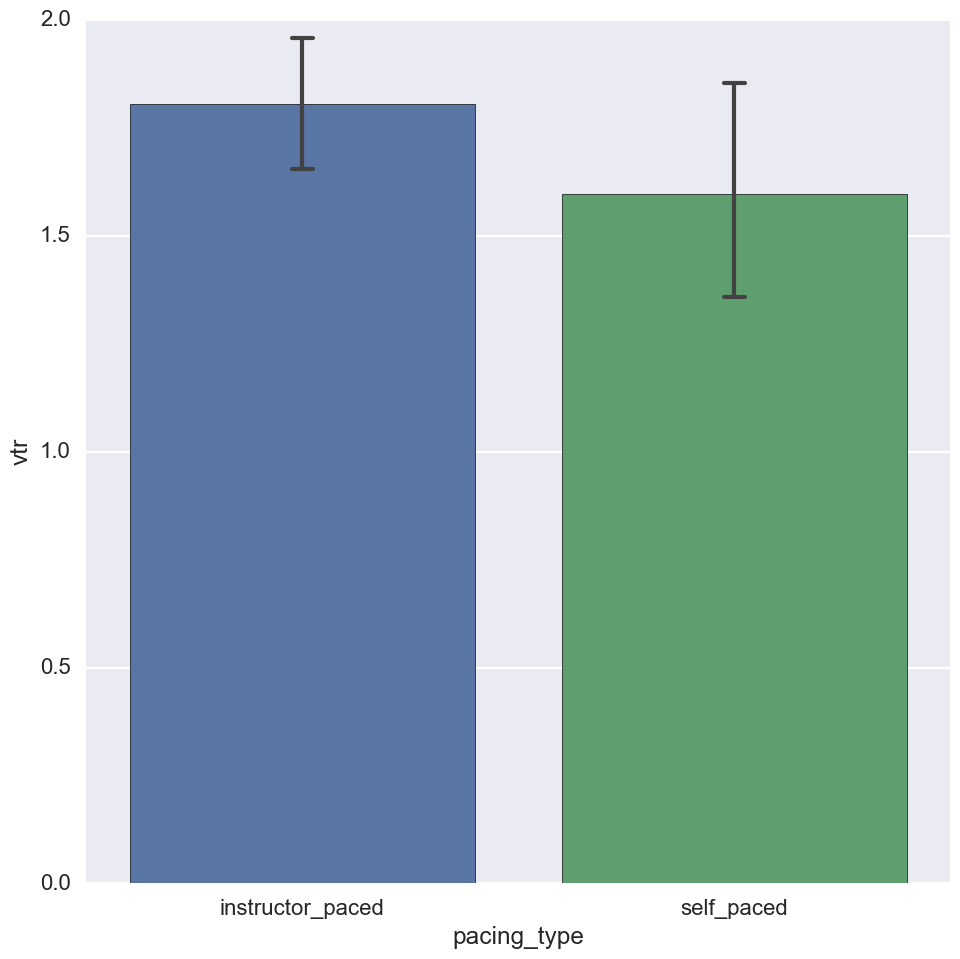

In [40]:
ax = sns.factorplot(data = pacing[pacing.cnt_enrolls_vtr>1000], x = 'pacing_type', y = 'vtr', kind = 'bar',
               size = 10, errwidth=3, capsize=0.05)

In [111]:
enroll_group_df.head()

,announce_date_start_date_delta,cnt_consumed_content,cnt_enrolls,cnt_enrolls_vtr,cnt_verifs,course_announce_date,course_id,course_seat_upgrade_deadline,course_start_date,enroll_group,level_type,org_id,pacing_type,program_title,program_type,subject_title
0,496,34,516,516,0,2014-08-26 04:42:11.341252,BerkeleyX/BJC.3x/1T2016,2016-01-19 23:59:00,2016-01-04 05:00:00,-30 to -60,Introductory,BerkeleyX,instructor_paced,None,None,None
1,496,26,295,295,1,2014-08-26 04:42:11.341252,BerkeleyX/BJC.3x/1T2016,2016-01-19 23:59:00,2016-01-04 05:00:00,-60 to -90,Introductory,BerkeleyX,instructor_paced,None,None,None
2,496,34,264,264,0,2014-08-26 04:42:11.341252,BerkeleyX/BJC.3x/1T2016,2016-01-19 23:59:00,2016-01-04 05:00:00,-90 to -120,Introductory,BerkeleyX,instructor_paced,None,None,None
3,496,151,753,753,2,2014-08-26 04:42:11.341252,BerkeleyX/BJC.3x/1T2016,2016-01-19 23:59:00,2016-01-04 05:00:00,0 to -30,Introductory,BerkeleyX,instructor_paced,None,None,None
4,496,46,428,327,2,2014-08-26 04:42:11.341252,BerkeleyX/BJC.3x/1T2016,2016-01-19 23:59:00,2016-01-04 05:00:00,0 to 30,Introductory,BerkeleyX,instructor_paced,None,None,None


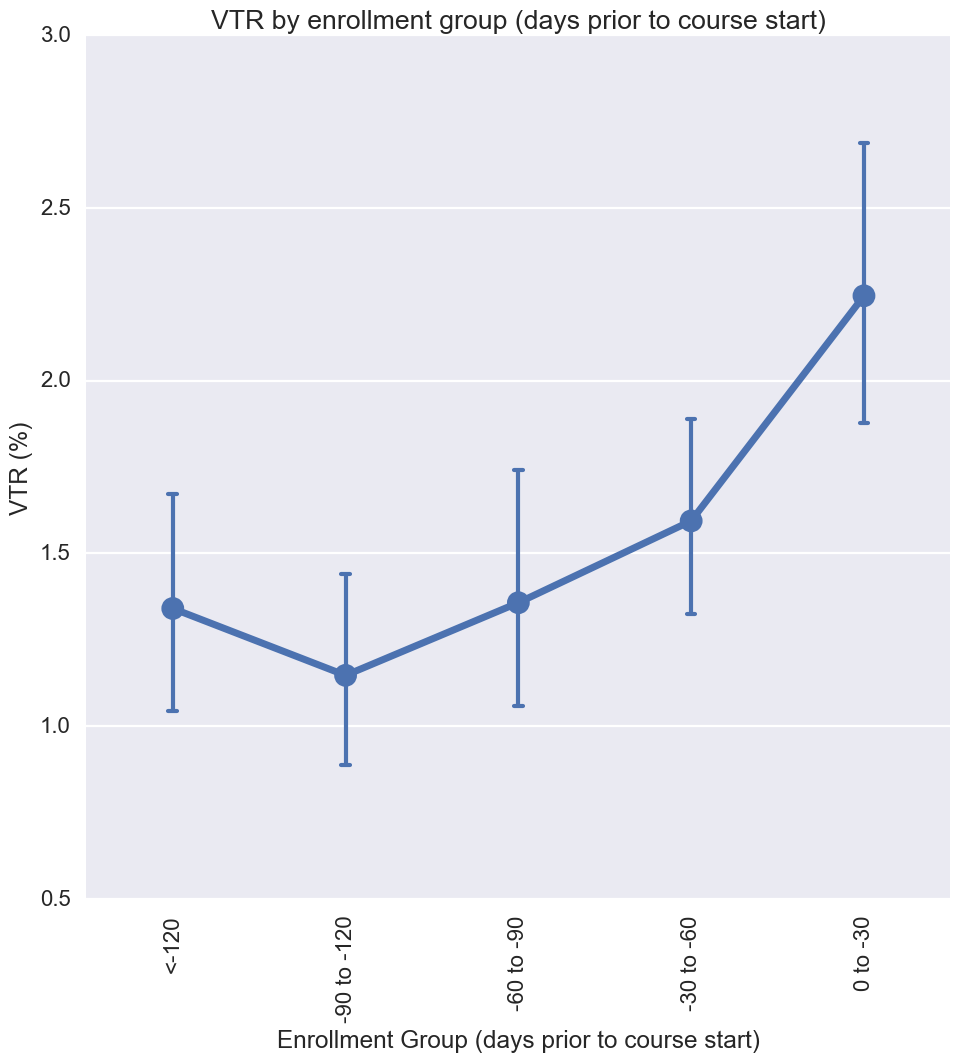

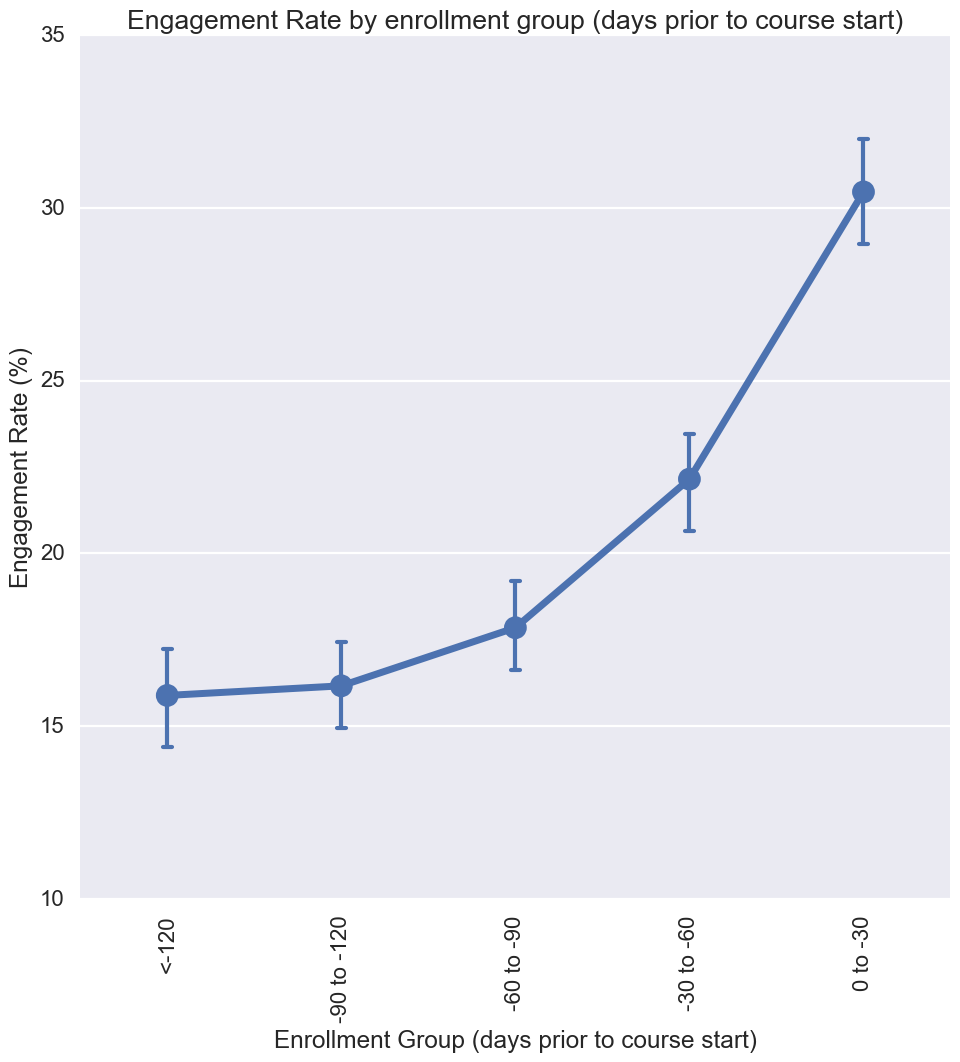

In [81]:
make_plots()

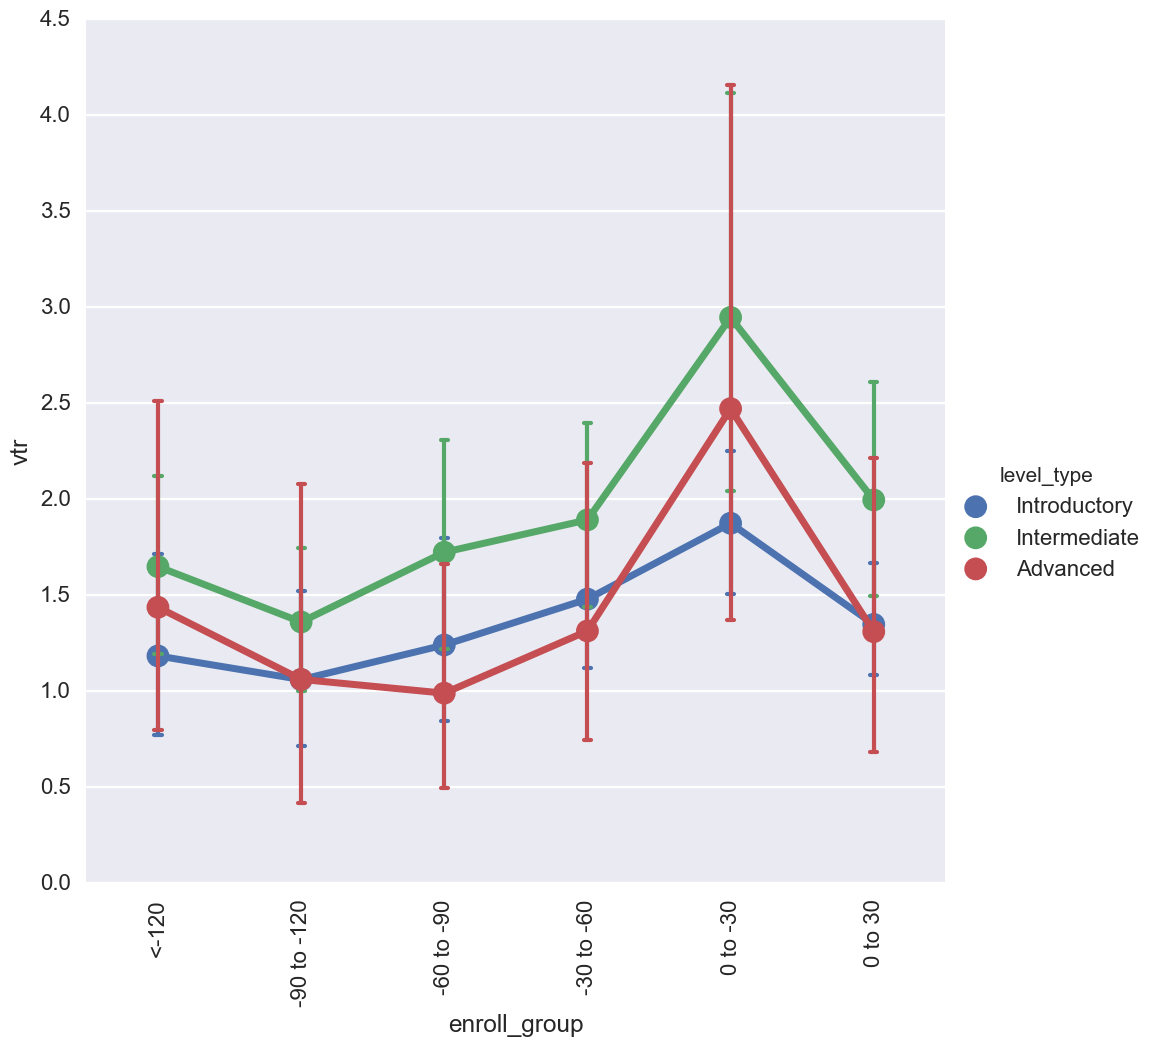

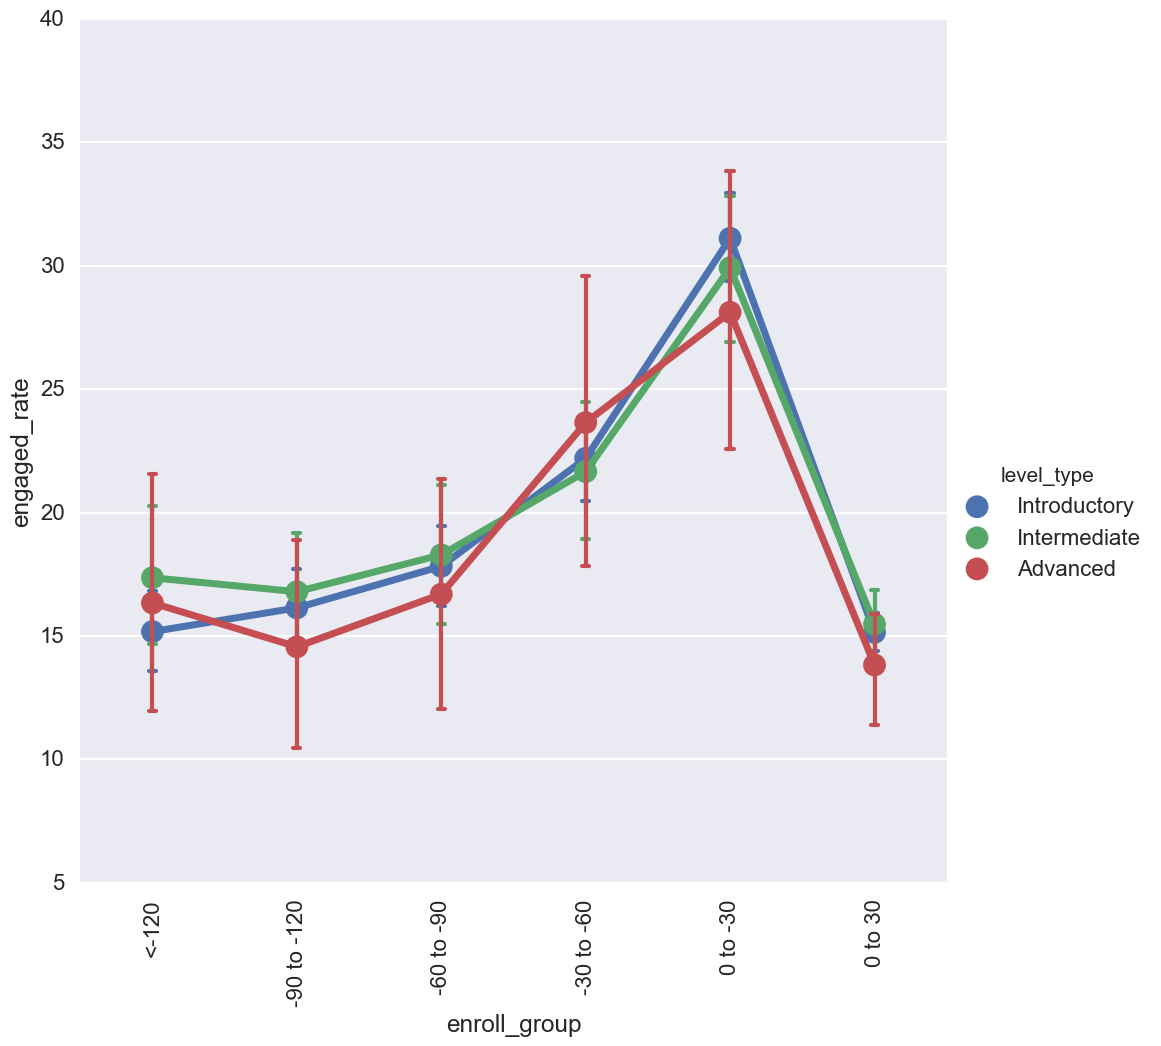

In [168]:
make_plots('level_type')

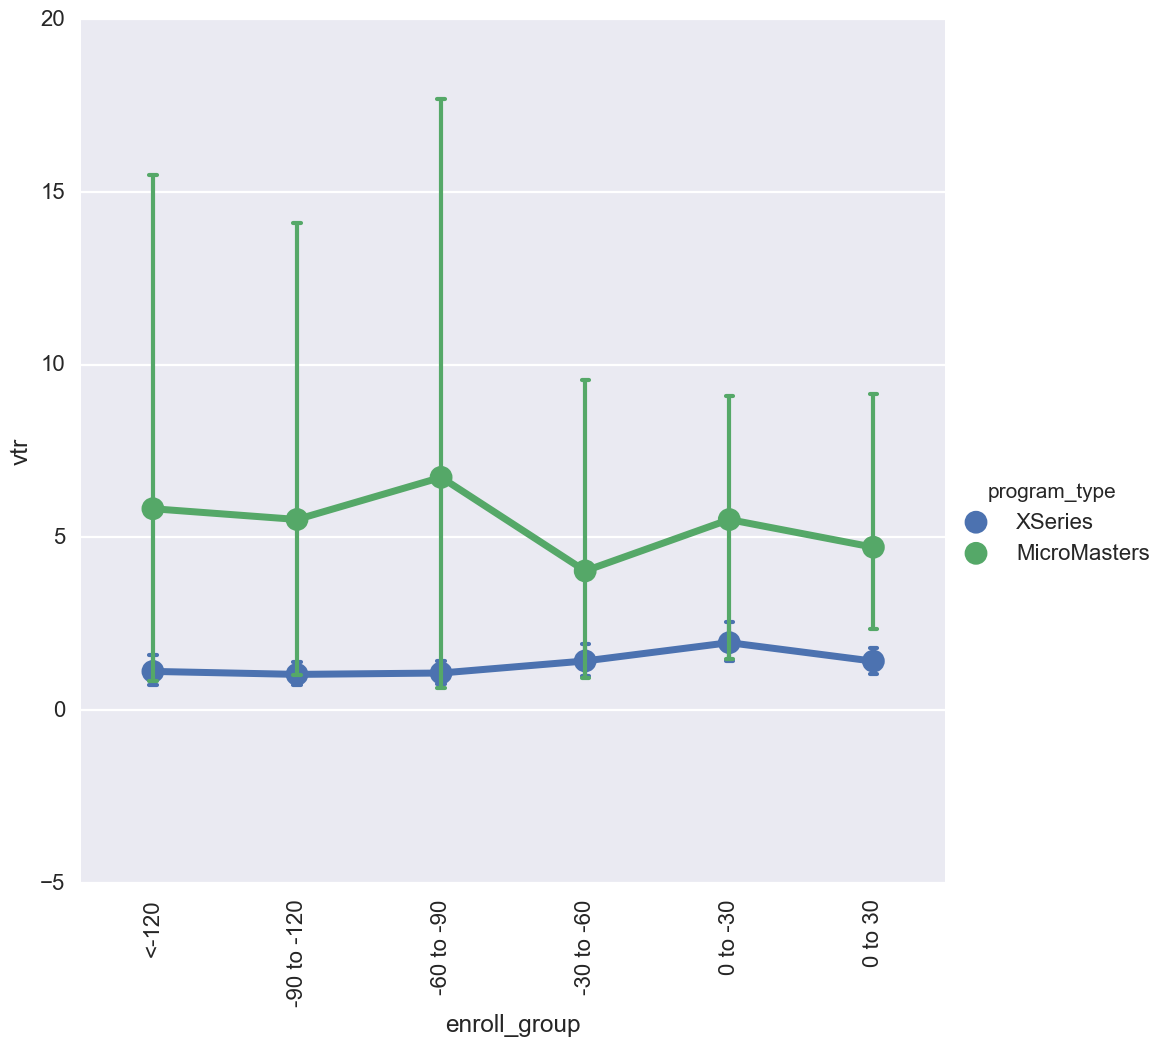

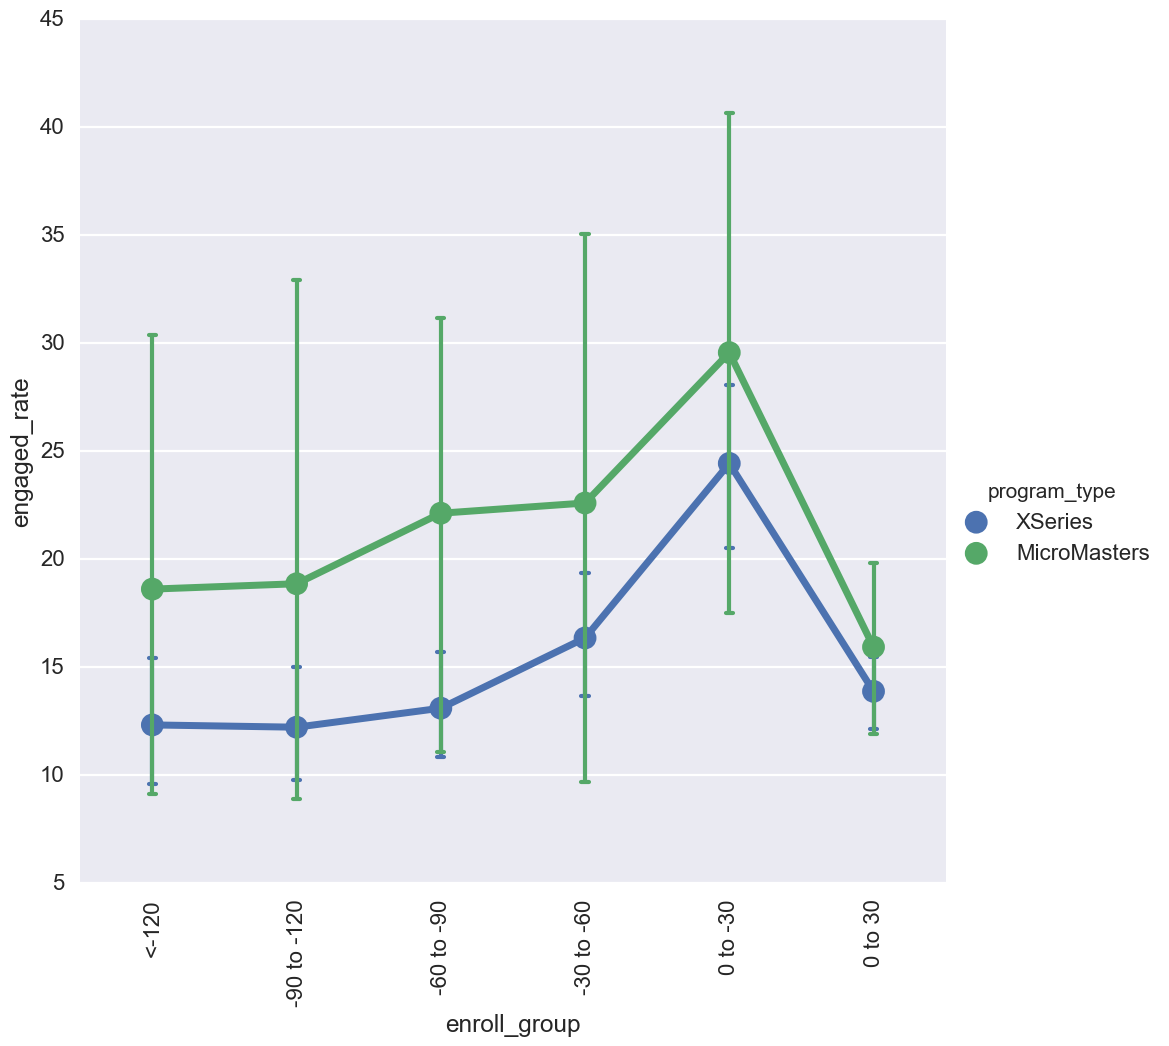

In [169]:
make_plots('program_type')

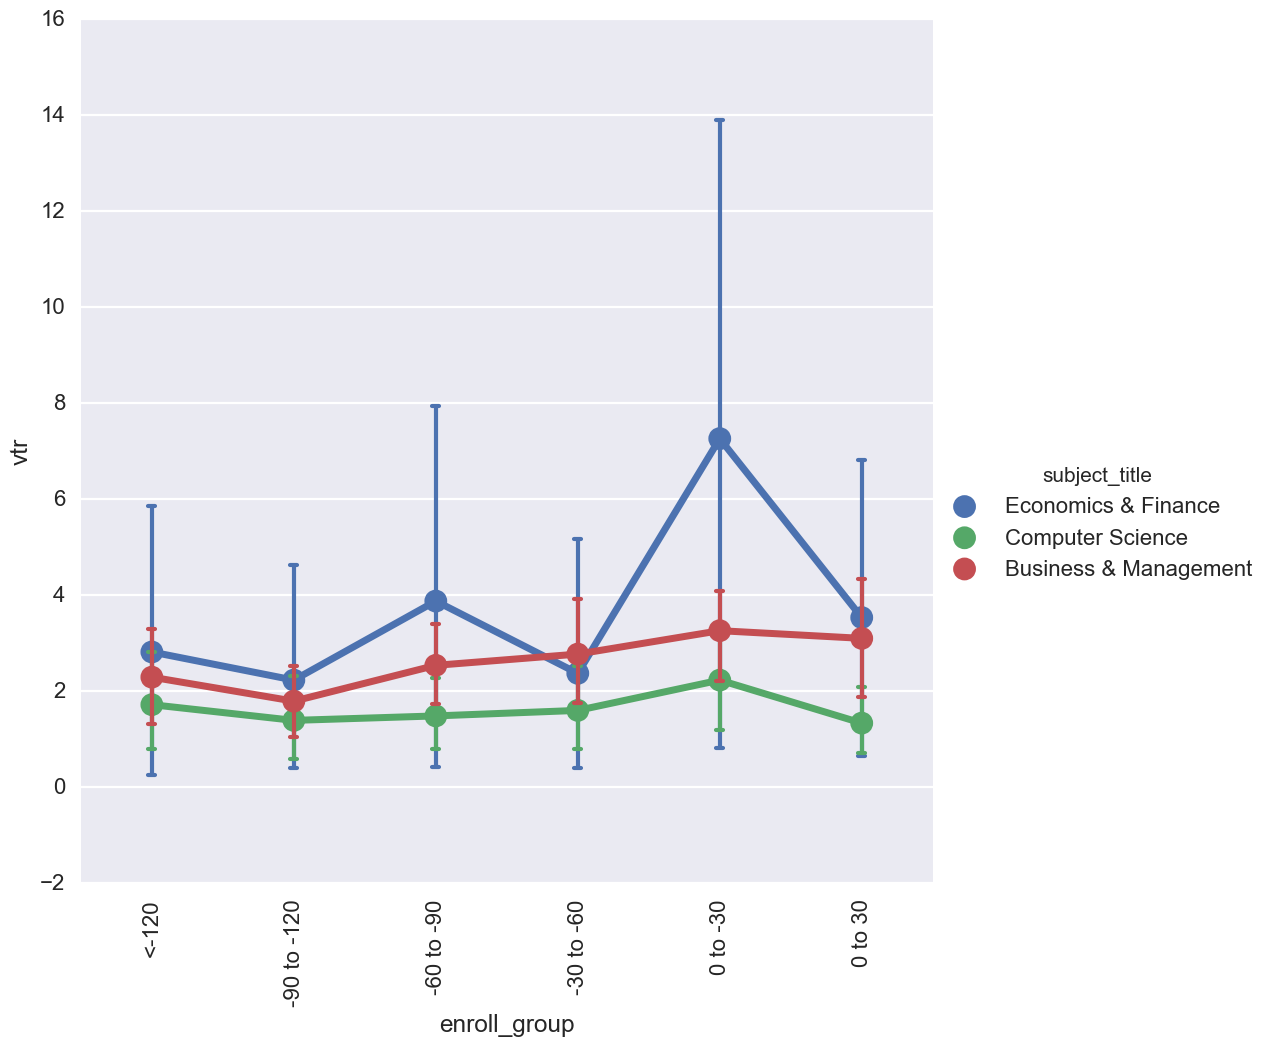

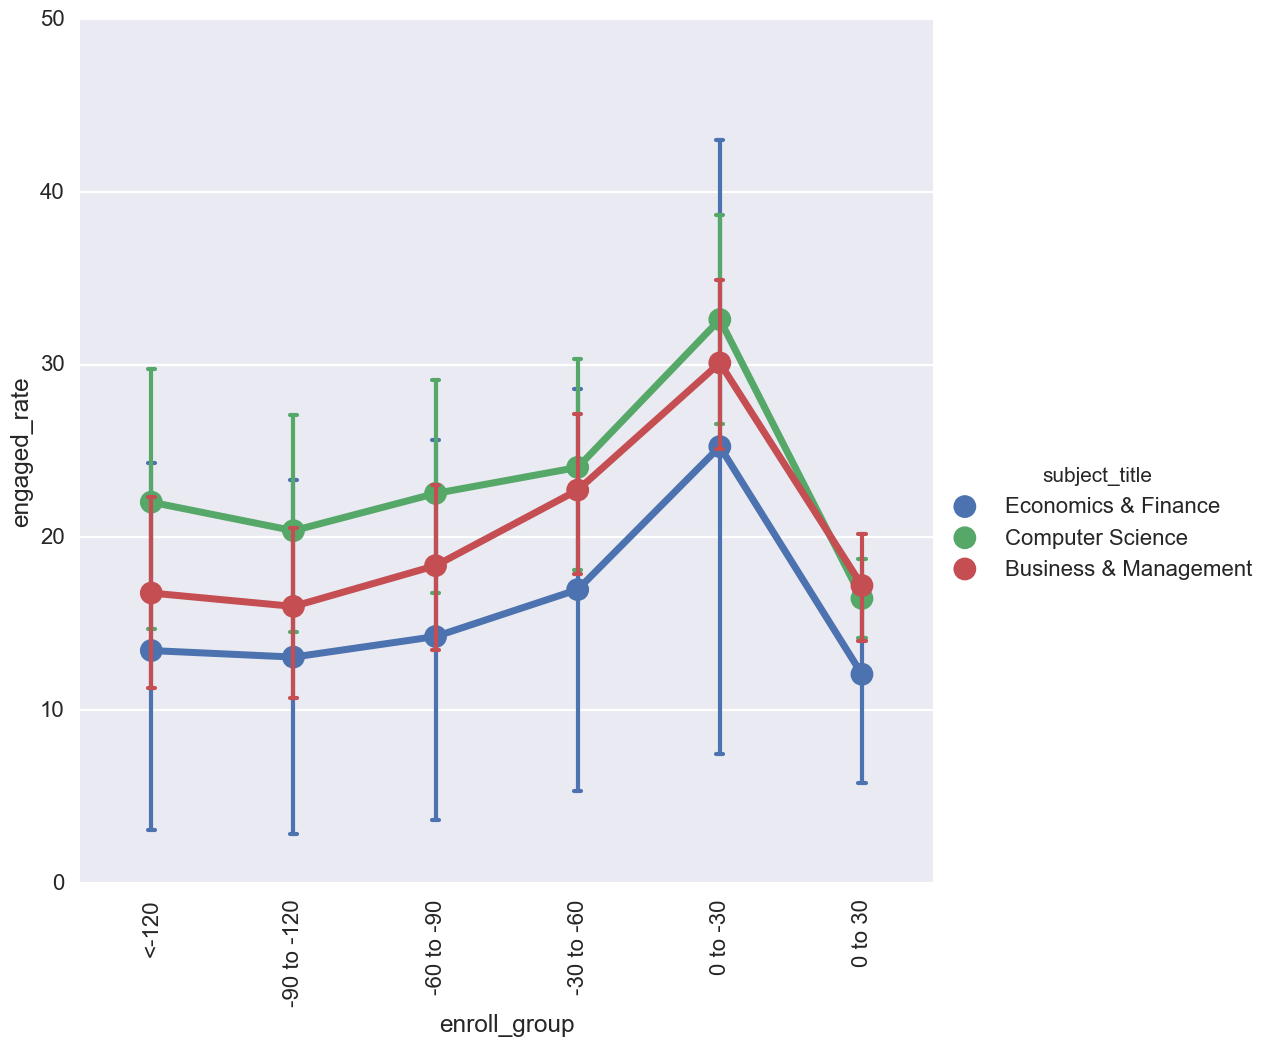

In [170]:
make_plots('subject_title', 3)

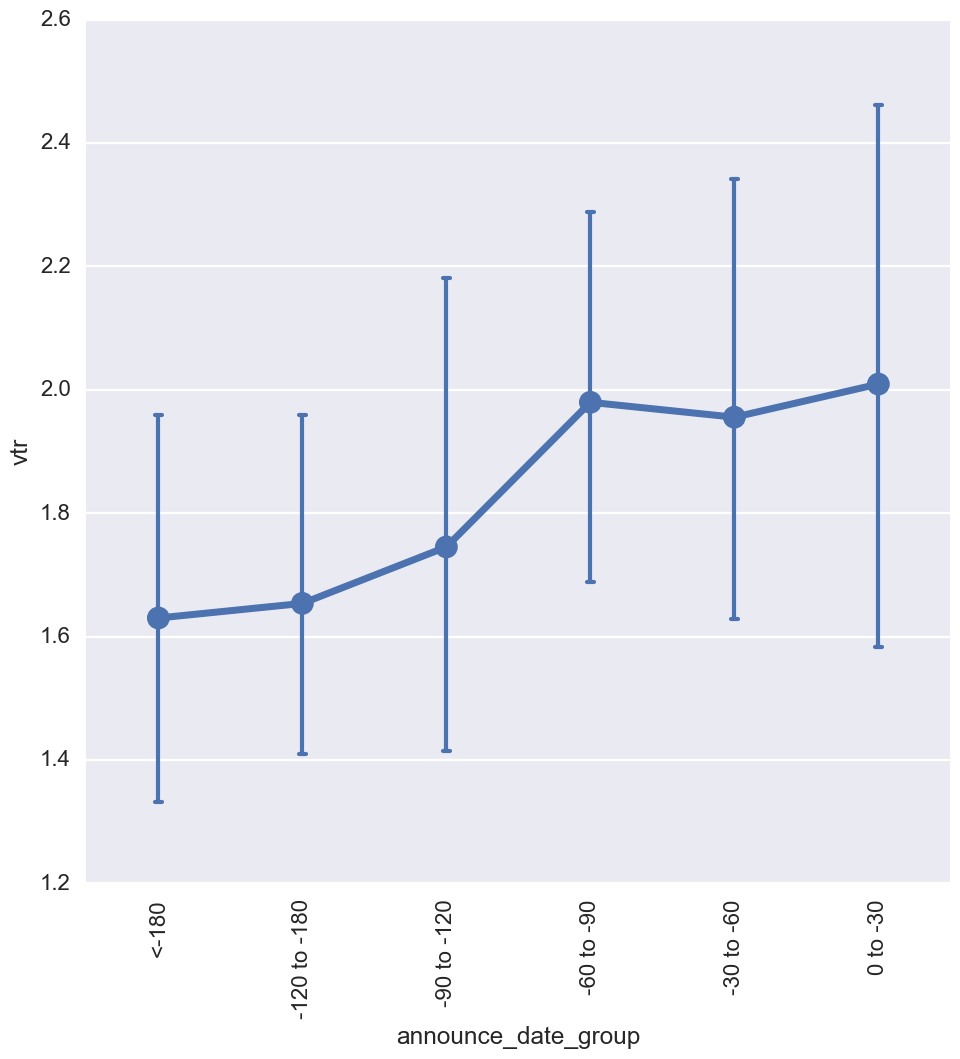

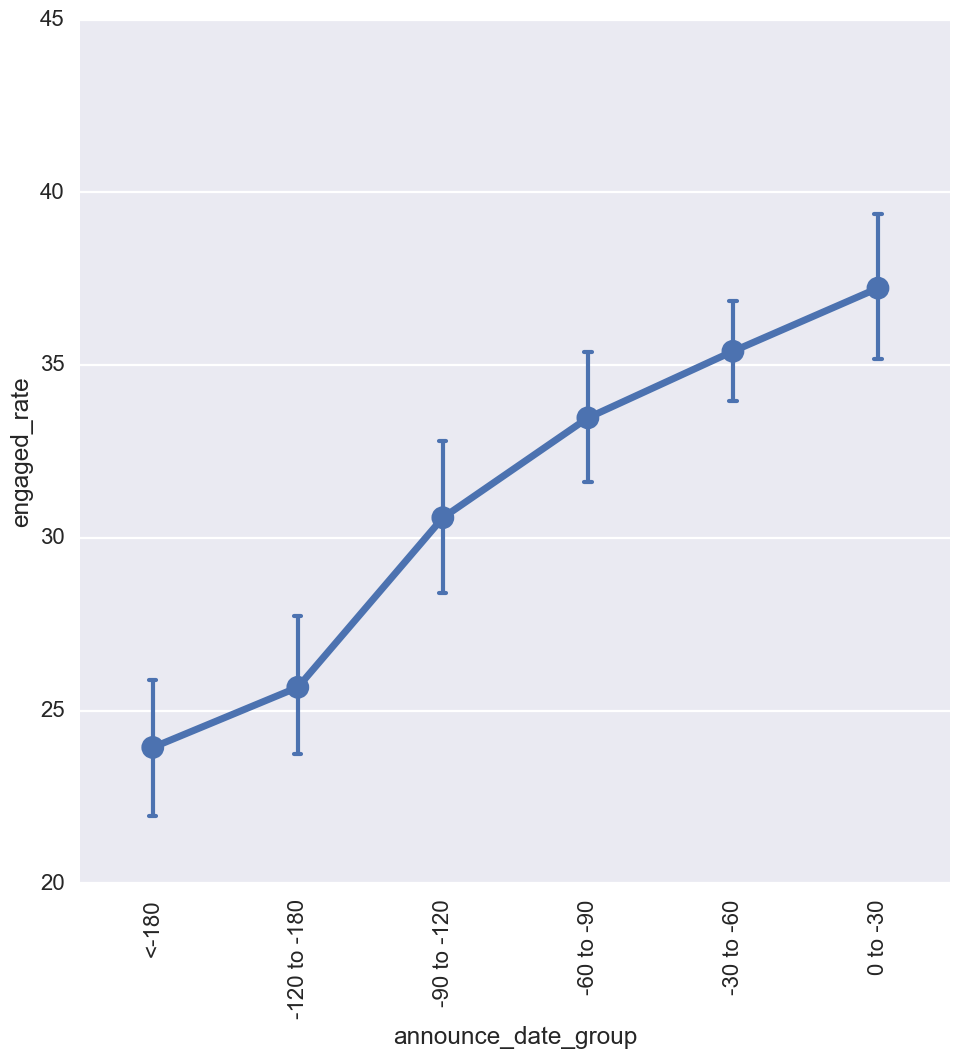

In [75]:
make_plots_course()

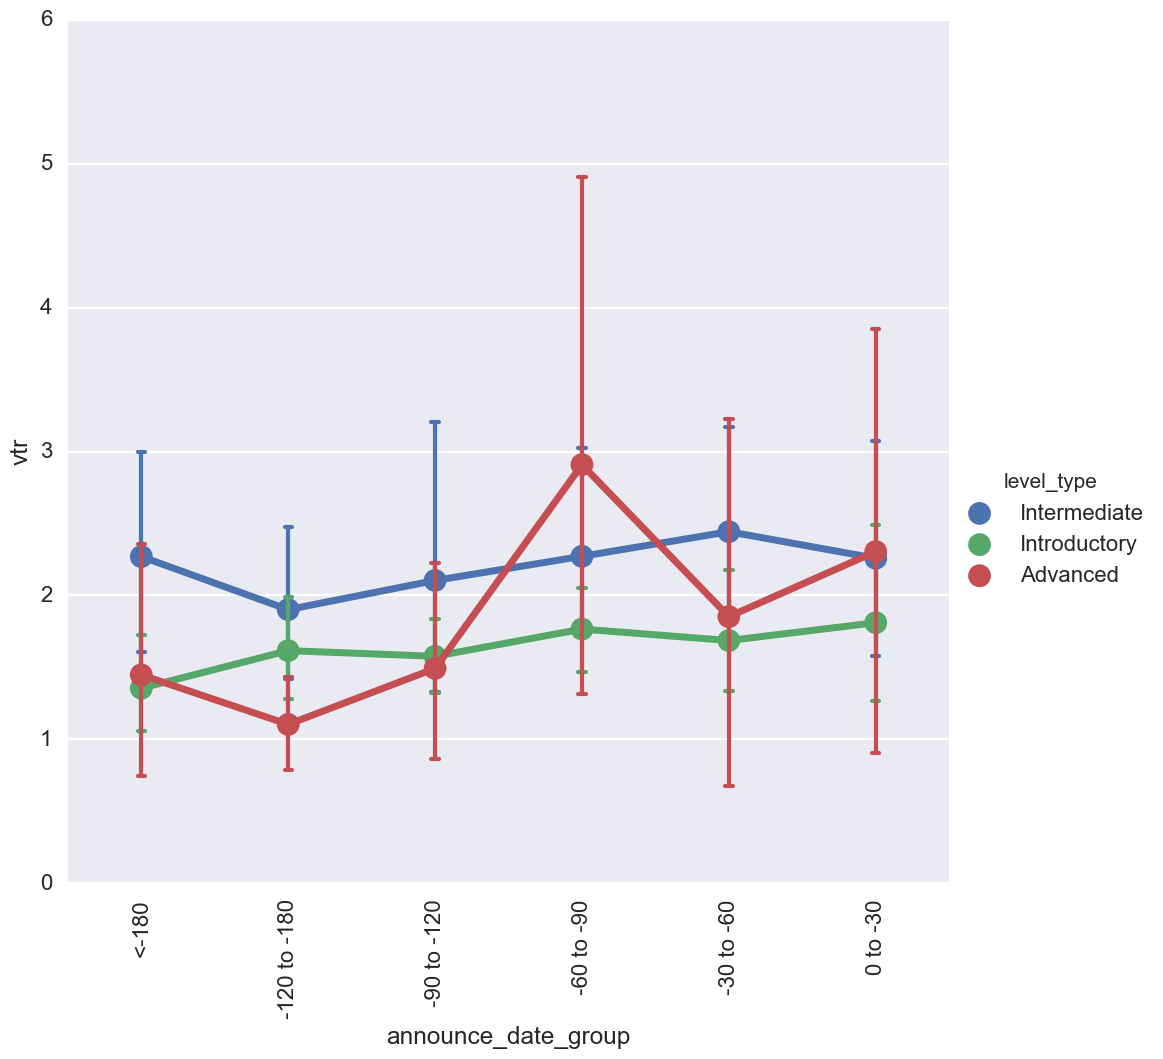

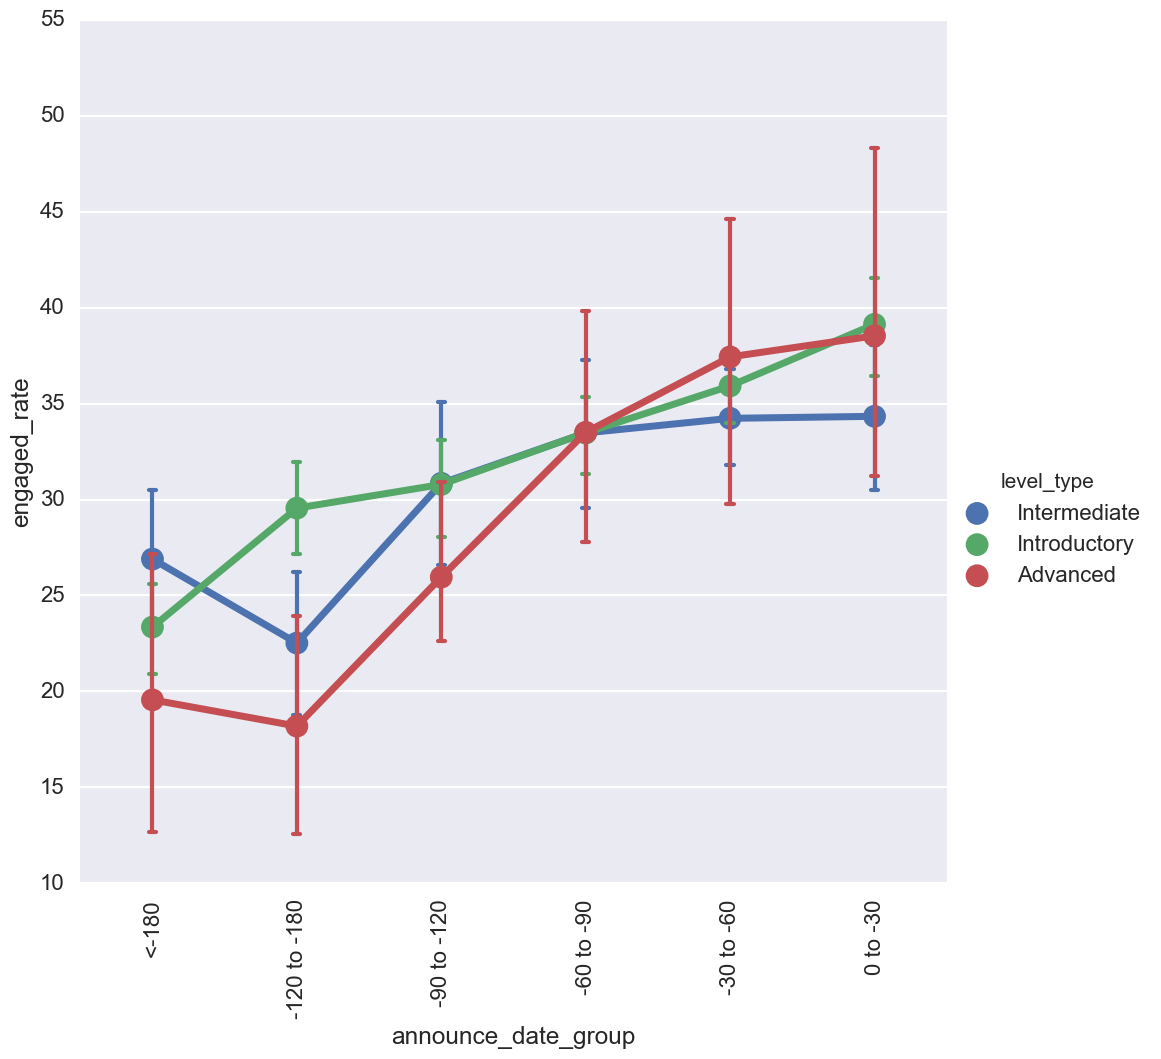

In [76]:
make_plots_course('level_type')

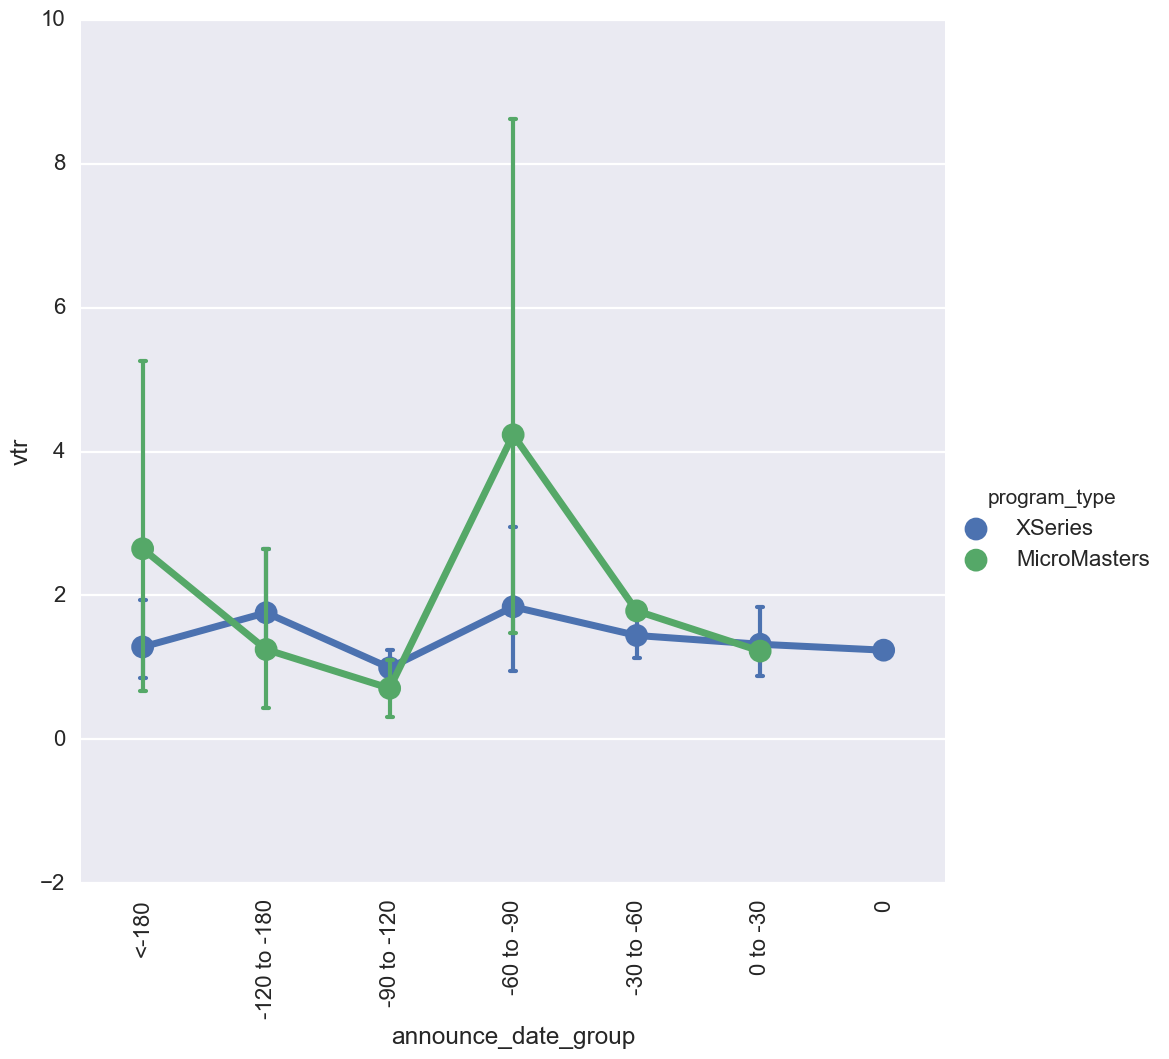

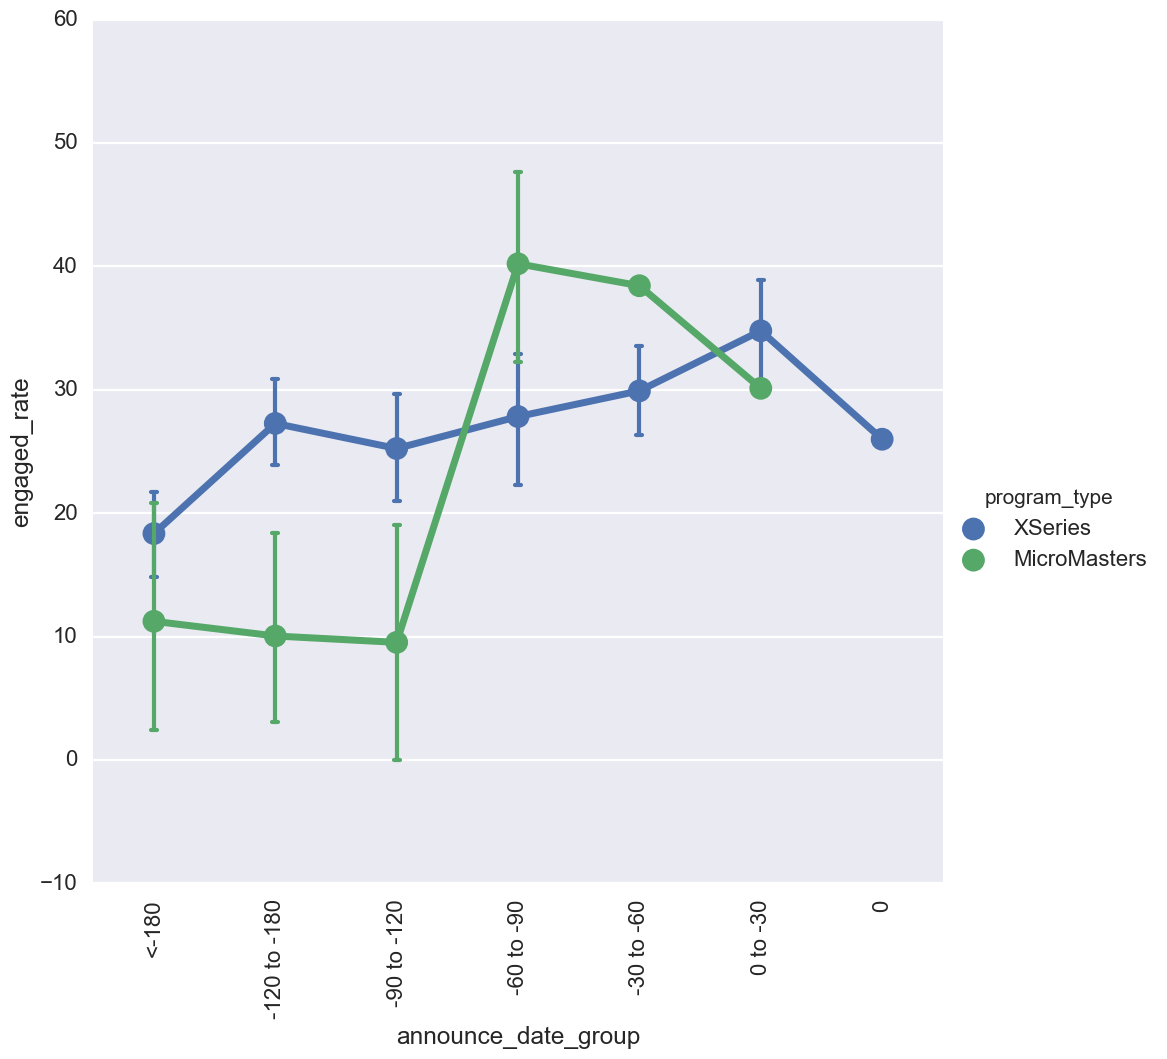

In [70]:
make_plots_course('program_type')

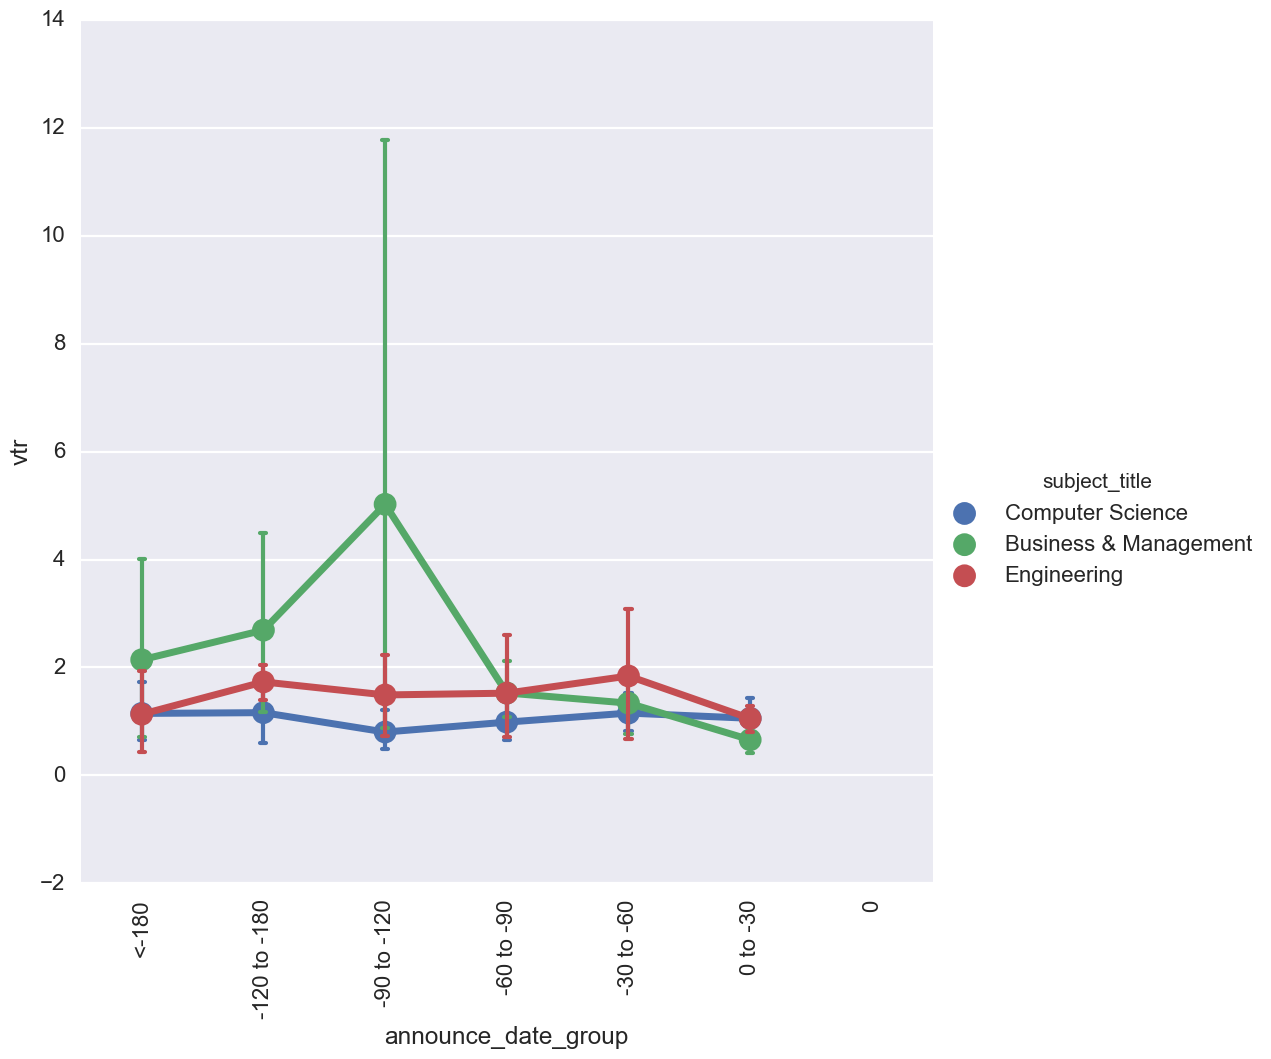

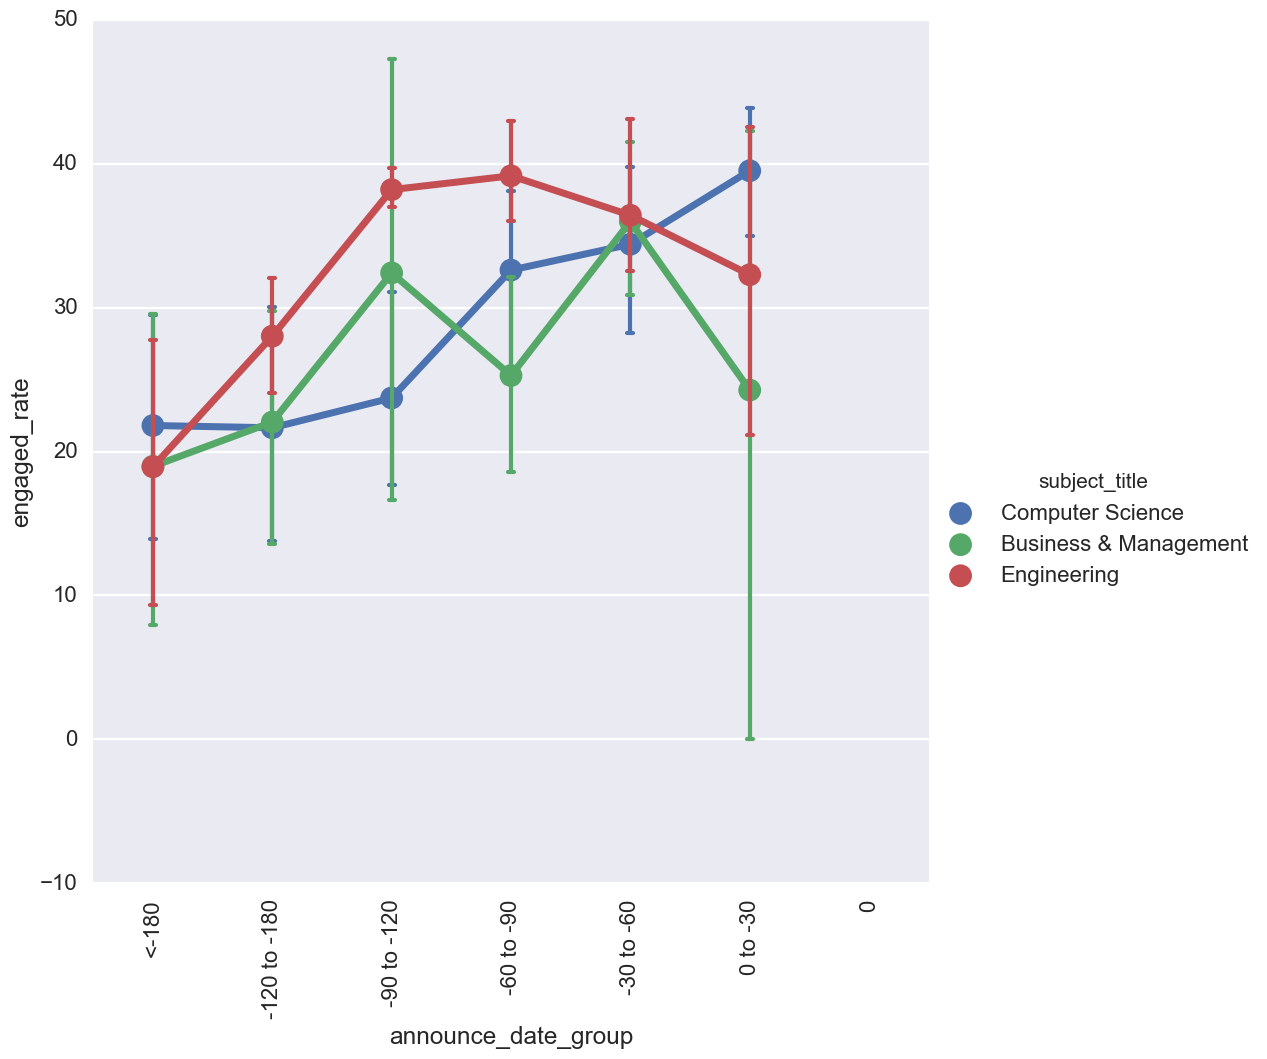

In [71]:
make_plots_course('subject_title', 3)